# Exercise 01: Line chart with styles

In [43]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

## Create exactly the same graph as the one below, including both values and style

In [44]:
db_path = "../data/checking-logs.sqlite"
conn = sqlite3.connect(db_path)

pageviews = pd.read_sql_query("SELECT * FROM pageviews", conn)
checker = pd.read_sql_query("SELECT * FROM checker", conn)

conn.close()

- Analyze only the users, not the admins.
- Analyze only the dates when there were both views and checker commits.


In [45]:
pageviews = pageviews[pageviews['uid'].str.startswith('user_')].copy()
pageviews['date'] = pd.to_datetime(pageviews['datetime']).dt.date
checker['date'] = pd.to_datetime(checker['timestamp']).dt.date

pageviews = pageviews[pageviews['uid'].str.startswith('user_')].copy()
pageviews['date'] = pd.to_datetime(pageviews['datetime']).dt.date
checker['date'] = pd.to_datetime(checker['timestamp']).dt.date

views = pageviews.groupby('date').size()
commits = checker.groupby('date').size()

df = pd.concat([views, commits], axis=1, join='inner').reset_index()
df.columns = ['date', 'views', 'commits']

In [46]:
len(df)

32

- The font size should be 8.
- The size of the figure should be (15, 8).

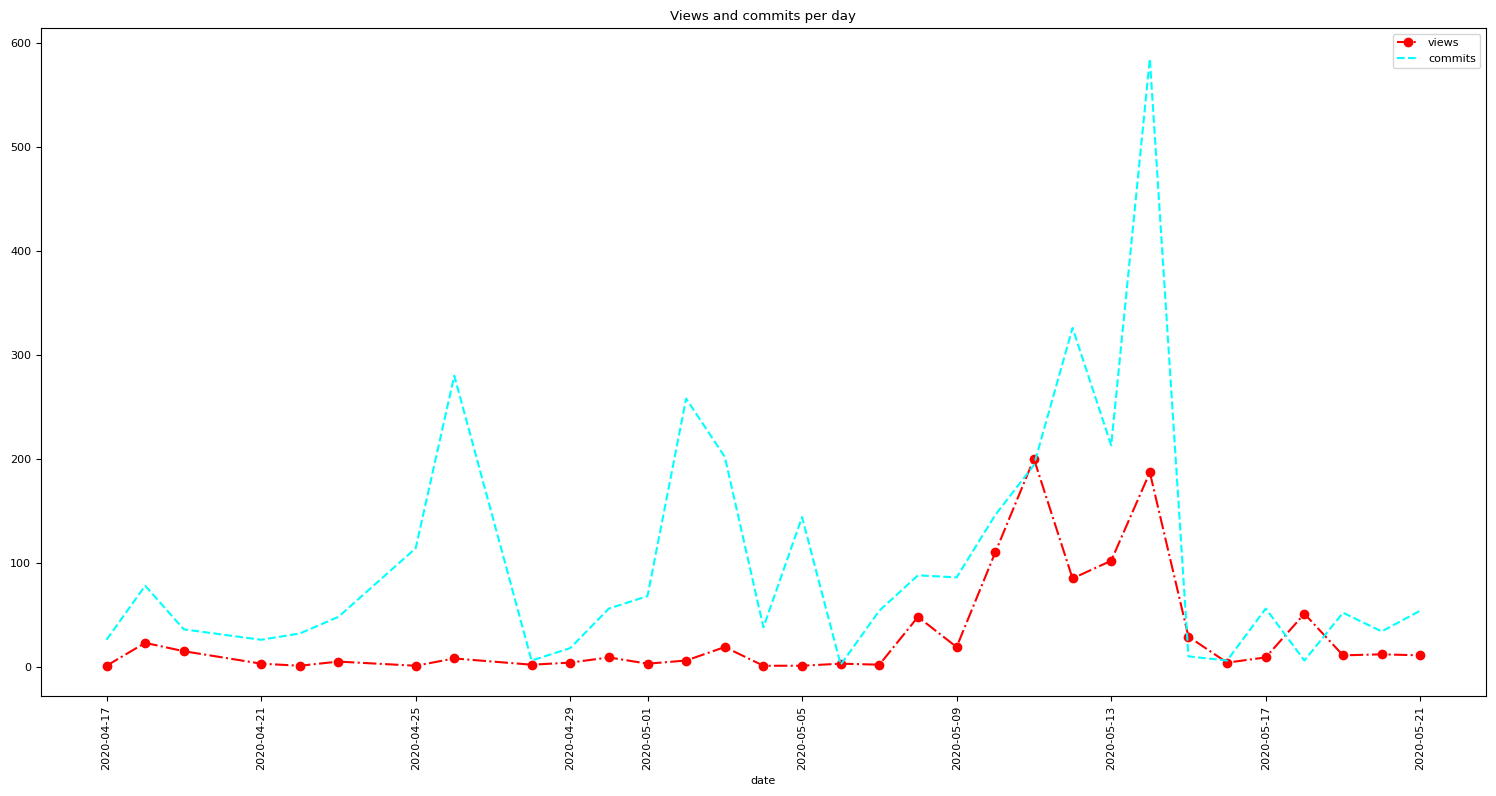

In [47]:
plt.figure(figsize=(15, 8))
plt.rcParams.update({'font.size': 8})

plt.plot(df['date'], df['views'], color='red', marker='o', linestyle='-.', label='views')
plt.plot(df['date'], df['commits'], color='cyan', linestyle='--', label='commits')

plt.title('Views and commits per day')
plt.xlabel('date')
plt.legend()
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [48]:
bolshe_150 = (df['views'] > 150).sum()
bolshe_150

np.int64(2)

At the end of your Jupyter Notebook, create a Markdown cell and insert the following question: "How many times was the number of views larger than 150?" Insert: "The answer is ____." Replace the underline with the actual number.

### How many times was the number of views larger than 150?
# The answer is 2.
